In [52]:
import pandas as pd
import os
os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()
df = pd.read_csv("./df.csv", encoding = 'euc-kr')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.api import Logit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import pydotplus
import warnings
warnings.filterwarnings('ignore')

# 대분류 =  식품일 때 로지스틱 회귀

In [55]:
df = df[['목표달성여부','대분류','중분류','월','요일','계절','시간대' ]]
df['목표달성여부'] = df['목표달성여부'].astype(int)
df = df[df['대분류'] == '식품']
df = df.drop("대분류", axis = 1)

In [56]:
# df_dummy = pd.get_dummies(df[["대분류", "중분류",'요일','계절','시간대']])
# df_new = pd.concat([df, df_dummy], axis = 1)
# df_new = df_new.drop(["대분류", "중분류", "대분류",'요일','계절','시간대'], axis = 1)

In [57]:
# train, test data 분리
df_train, df_test = train_test_split(df, test_size = 0.4, random_state = 1234)


In [58]:
log_model = Logit.from_formula("목표달성여부 ~ C(중분류)+C(요일)+C(계절)+C(시간대)+월", df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.583726
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 목표달성여부   No. Observations:                 3765
Model:                          Logit   Df Residuals:                     3741
Method:                           MLE   Df Model:                           23
Date:                Wed, 31 May 2023   Pseudo R-squ.:                0.008691
Time:                        14:23:45   Log-Likelihood:                -2197.7
converged:                       True   LL-Null:                       -2217.0
Covariance Type:            nonrobust   LLR p-value:                   0.02229
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2038      0.214     -5.625      0.000      -1.623      -0.784
C(중분류)[T.건강식품]   

In [59]:
y_pred_train = log_result.predict(df_train)
y_pred_train_class = (y_pred_train>0.4).astype(int)
print("Confusion Matrix:\n{}".format(confusion_matrix(df_train['목표달성여부'], y_pred_train_class)),'\n')

y_pred_test = log_result.predict(df_test)
y_pred_test_class = (y_pred_test>0.4).astype(int)
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test['목표달성여부'], y_pred_test_class)),'\n')


Confusion Matrix:
[[2710   17]
 [1025   13]] 

Confusion Matrix:
[[1787   17]
 [ 698    8]] 



In [60]:
print('Trian 예측/분류 결과')
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train['목표달성여부'], y_pred_train_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['목표달성여부'], y_pred_train_class)),'\n')
print(classification_report(df_train['목표달성여부'], y_pred_train_class,target_names = ['성공', '실패'] ,digits=3))

Trian 예측/분류 결과
Accuracy: 0.723

Confusion Matrix:
[[2710   17]
 [1025   13]] 

              precision    recall  f1-score   support

          성공      0.726     0.994     0.839      2727
          실패      0.433     0.013     0.024      1038

    accuracy                          0.723      3765
   macro avg      0.579     0.503     0.432      3765
weighted avg      0.645     0.723     0.614      3765



In [61]:
print('Test 예측/분류 결과')
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test['목표달성여부'], y_pred_test_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test['목표달성여부'], y_pred_test_class)),'\n')
print(classification_report(df_test['목표달성여부'], y_pred_test_class,target_names = ['성공', '실패'], digits=3))

Test 예측/분류 결과
Accuracy: 0.715

Confusion Matrix:
[[1787   17]
 [ 698    8]] 

              precision    recall  f1-score   support

          성공      0.719     0.991     0.833      1804
          실패      0.320     0.011     0.022       706

    accuracy                          0.715      2510
   macro avg      0.520     0.501     0.428      2510
weighted avg      0.607     0.715     0.605      2510



<Axes: >

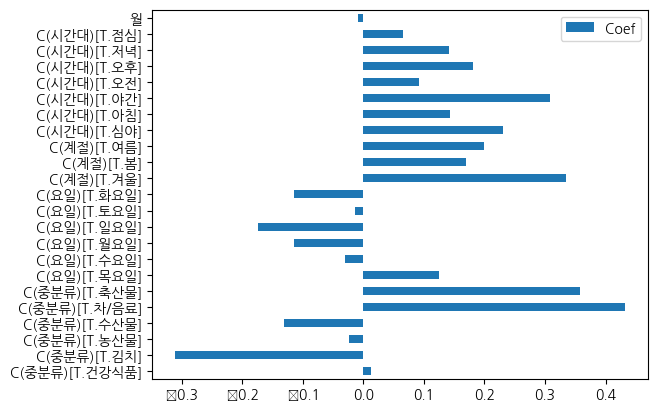

In [62]:
df_logistic_coef = pd.DataFrame({'Coef':log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')